<a href="https://colab.research.google.com/github/HiagoAD/GDI2/blob/master/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


## **Datasets**


In [81]:
dengue = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/dengue.csv", encoding ="UTF-8")
emlurb = pd.read_csv("https://raw.githubusercontent.com/HiagoAD/GDI2/master/datasets/emlurb.csv", encoding ="UTF-8")


## **Detalhamento de datasets**


In [82]:
pd.to_datetime("2020-07-08T00:00:00")

Timestamp('2020-07-08 00:00:00')

In [ ]:
emlurb.head()

In [ ]:
dengue.describe()

## **Reorganização de Datasets**

In [ ]:
dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data["no_bairro_residencia"].value_counts()

In [ ]:
dengue_data["dt_notificacao"] = pd.to_datetime(dengue_data["dt_notificacao"])
dengue_data = dengue_data.groupby(["no_bairro_residencia", "dt_notificacao"]).size().reset_index(name="CASOS_DENGUE")

dengue_data.head()

In [85]:
emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data = emlurb_data[(emlurb_data.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"])

In [86]:
emlurb_data = emlurb_data.groupby(["BAIRRO", "DATA_DEMANDA"]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data.head()


,BAIRRO,DATA_DEMANDA,CHAMADOS_EMLURB
0,AFLITOS,2020-01-15,1
1,AFLITOS,2020-03-03,1
2,AFLITOS,2020-03-04,1
3,AFLITOS,2020-04-16,1
4,AFLITOS,2020-04-17,1


In [87]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["no_bairro_residencia","dt_notificacao"],right_on=["BAIRRO", "DATA_DEMANDA"])
crossed_info.head()

,no_bairro_residencia,dt_notificacao,CASOS_DENGUE,BAIRRO,DATA_DEMANDA,CHAMADOS_EMLURB
0,AFOGADOS,2020-01-13,1,AFOGADOS,2020-01-13,4
1,AFOGADOS,2020-01-23,1,AFOGADOS,2020-01-23,1
2,AFOGADOS,2020-01-29,1,AFOGADOS,2020-01-29,1
3,AFOGADOS,2020-02-03,1,AFOGADOS,2020-02-03,1
4,AFOGADOS,2020-02-05,4,AFOGADOS,2020-02-05,2


In [ ]:
pd.set_option('display.max_rows', None)
print(crossed_info)

In [88]:
from scipy import stats
stats.ttest_rel(crossed_info['CASOS_DENGUE'], crossed_info['CHAMADOS_EMLURB'])

Ttest_relResult(statistic=-2.049378462269129, pvalue=0.04146883067279564)



Aparentemente, não há forte correlação diária entre os pedidos de drenagem e os casos de dengue, mas há indícios de. 



Próximos passos
  * Analizar chamados não atendidos

# **Análise de chamados de drenagem não atendidos pela EMLURB x Casos de Dengue**

In [ ]:
dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data["no_bairro_residencia"].value_counts()

In [ ]:
dengue_data["dt_notificacao"] = pd.to_datetime(dengue_data["dt_notificacao"])

dengue_data = dengue_data.groupby(["no_bairro_residencia", "dt_notificacao"]).size().reset_index(name="CASOS_DENGUE")

dengue_data.head()

In [ ]:
emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA", "SITUACAO"]]
emlurb_data = emlurb_data[(emlurb_data.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]
emlurb_data = emlurb_data[(emlurb_data.SITUACAO != "ATENDIDA")]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"])

emlurb_data.head()

In [ ]:
emlurb_data = emlurb_data.groupby(["BAIRRO", "DATA_DEMANDA"]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data.head()


In [116]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["no_bairro_residencia","dt_notificacao"],right_on=["BAIRRO", "DATA_DEMANDA"])
crossed_info.head()

,no_bairro_residencia,dt_notificacao,CASOS_DENGUE,BAIRRO,DATA_DEMANDA,CHAMADOS_EMLURB
0,AFOGADOS,2020-01-13,1,AFOGADOS,2020-01-13,4
1,AFOGADOS,2020-01-23,1,AFOGADOS,2020-01-23,1
2,AFOGADOS,2020-01-29,1,AFOGADOS,2020-01-29,1
3,AFOGADOS,2020-02-03,1,AFOGADOS,2020-02-03,1
4,AFOGADOS,2020-02-05,4,AFOGADOS,2020-02-05,2


In [114]:
crossed_info.size

1374

In [115]:
# Analise da correlação

from scipy import stats
stats.ttest_rel(crossed_info['CASOS_DENGUE'], crossed_info['CHAMADOS_EMLURB'])

Ttest_relResult(statistic=-0.8150945908464697, pvalue=0.4158687761557307)

Há **forte** correlação entre casos diários de dengue com chamados de drenagem não atendidos pela EMLURB no ano de 2020.

Próximos passos:
  * Analizar novamente casos gerais, porém na escala de um mês em vez de diária

## Estudo de gráficos

Primeiro, analisamos as tabelas com os dados originais. Coletando o número de casos de dengue e solicitações de drenagem por bairro. Em seguida, utilizamos a tabela com informações cruzadas.

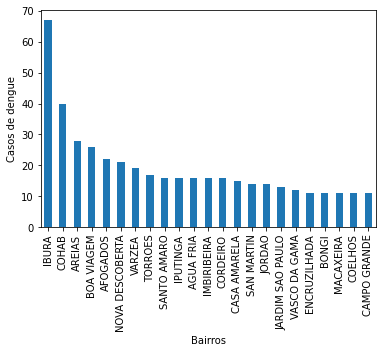

In [136]:
# Análise para Casos de dengue x Bairros (para mais de 10 casos de dengue)

dengue_filter = dengue_data.groupby("no_bairro_residencia").filter(lambda x: len(x) > 10)
dengue_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue', xlabel='Bairros')

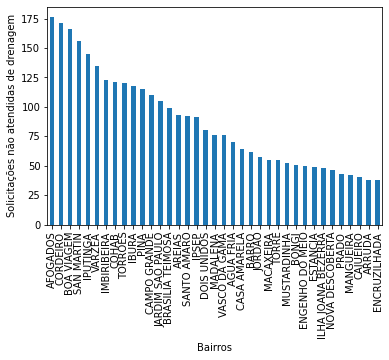

In [137]:
# Análise para Solicitações não atendidas de drenagem x Bairros (para mais de 35 chamados não atendidos)

emlurb_filter = emlurb_data.groupby("BAIRRO").filter(lambda x: len(x) > 35)
emlurb_filter['BAIRRO'].value_counts().plot(kind='bar', ylabel='Solicitações não atendidas de drenagem', xlabel='Bairros')

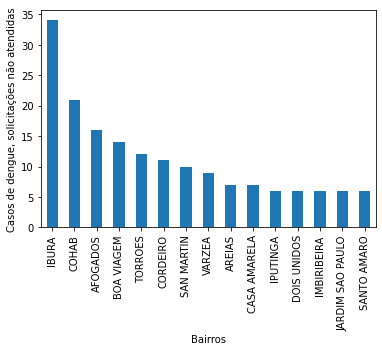

In [139]:
# Análise para Casos de dengue com solicitações não atendidas de drenagem x Bairros (mais de 5 casos)

crossed_info_filter = crossed_info.groupby("no_bairro_residencia").filter(lambda x: len(x) > 5)
crossed_info_filter['no_bairro_residencia'].value_counts().plot(kind='bar', ylabel='Casos de dengue, solicitações não atendidas', xlabel='Bairros')

# **Análise de chamados de drenagem  x Casos de Dengue (Mensal)**

In [18]:
dengue_data = dengue[["no_bairro_residencia", "dt_notificacao"]]
dengue_data.head()

,no_bairro_residencia,dt_notificacao
0,ROSARINHO,2020-06-26T00:00:00
1,CASA AMARELA,2020-06-22T00:00:00
2,SANTO AMARO,2020-01-09T00:00:00
3,GRACAS,2020-01-03T00:00:00
4,TAMARINEIRA,2020-01-13T00:00:00


In [19]:
dengue_data["dt_notificacao"] = pd.to_datetime(dengue["dt_notificacao"], infer_datetime_format=True)

dengue_data=dengue_data.groupby([pd.Grouper(key="dt_notificacao", freq="M"), "no_bairro_residencia"]).size().reset_index(name="CASOS_DENGUE")
dengue_data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CASOS_DENGUE
count,321.000000
mean,3.099688
std,6.548571
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,106.000000


In [20]:
emlurb_data = emlurb[["GRUPOSERVICO_DESCRICAO", "BAIRRO", "DATA_DEMANDA"]]
emlurb_data = emlurb_data[(emlurb_data.GRUPOSERVICO_DESCRICAO == "DRENAGEM")]
emlurb_data["DATA_DEMANDA"] = pd.to_datetime(emlurb_data["DATA_DEMANDA"], infer_datetime_format=True)

emlurb_data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


,GRUPOSERVICO_DESCRICAO,BAIRRO,DATA_DEMANDA
count,8340,8340,8340
unique,1,93,349
top,DRENAGEM,SANTO AMARO,2020-03-16 00:00:00
freq,8340,436,117
first,NaN,NaN,2020-01-01 00:00:00
last,NaN,NaN,2020-12-25 00:00:00


In [21]:
emlurb_data = emlurb_data.groupby([pd.Grouper(key="DATA_DEMANDA", freq="M"), "BAIRRO"]).size().reset_index(name="CHAMADOS_EMLURB")
emlurb_data.describe()

,CHAMADOS_EMLURB
count,960.000000
mean,8.687500
std,9.932318
min,1.000000
25%,2.000000
50%,5.000000
75%,12.000000
max,70.000000


In [22]:
crossed_info = pd.merge(dengue_data, emlurb_data, left_on=["no_bairro_residencia","dt_notificacao"],right_on=["BAIRRO", "DATA_DEMANDA"])
crossed_info.head()

,dt_notificacao,no_bairro_residencia,CASOS_DENGUE,DATA_DEMANDA,BAIRRO,CHAMADOS_EMLURB
0,2020-01-31,AFOGADOS,5,2020-01-31,AFOGADOS,24
1,2020-01-31,AGUA FRIA,4,2020-01-31,AGUA FRIA,13
2,2020-01-31,ALTO DO MANDU,2,2020-01-31,ALTO DO MANDU,2
3,2020-01-31,ALTO JOSE BONIFACIO,2,2020-01-31,ALTO JOSE BONIFACIO,2
4,2020-01-31,ALTO JOSE DO PINHO,5,2020-01-31,ALTO JOSE DO PINHO,3


In [23]:
# Analise da correlação

from scipy import stats
stats.ttest_rel(crossed_info['CASOS_DENGUE'], crossed_info['CHAMADOS_EMLURB'])

Ttest_relResult(statistic=-11.40880858770702, pvalue=4.678854372548063e-25)

Há **fraca** correlação entre casos mensais de dengue com chamados de drenagem não atendidos pela EMLURB no ano de 2020.
